In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import datetime

from kiblib.utils.db import DbConn

In [2]:
db_conn = DbConn().create_engine()

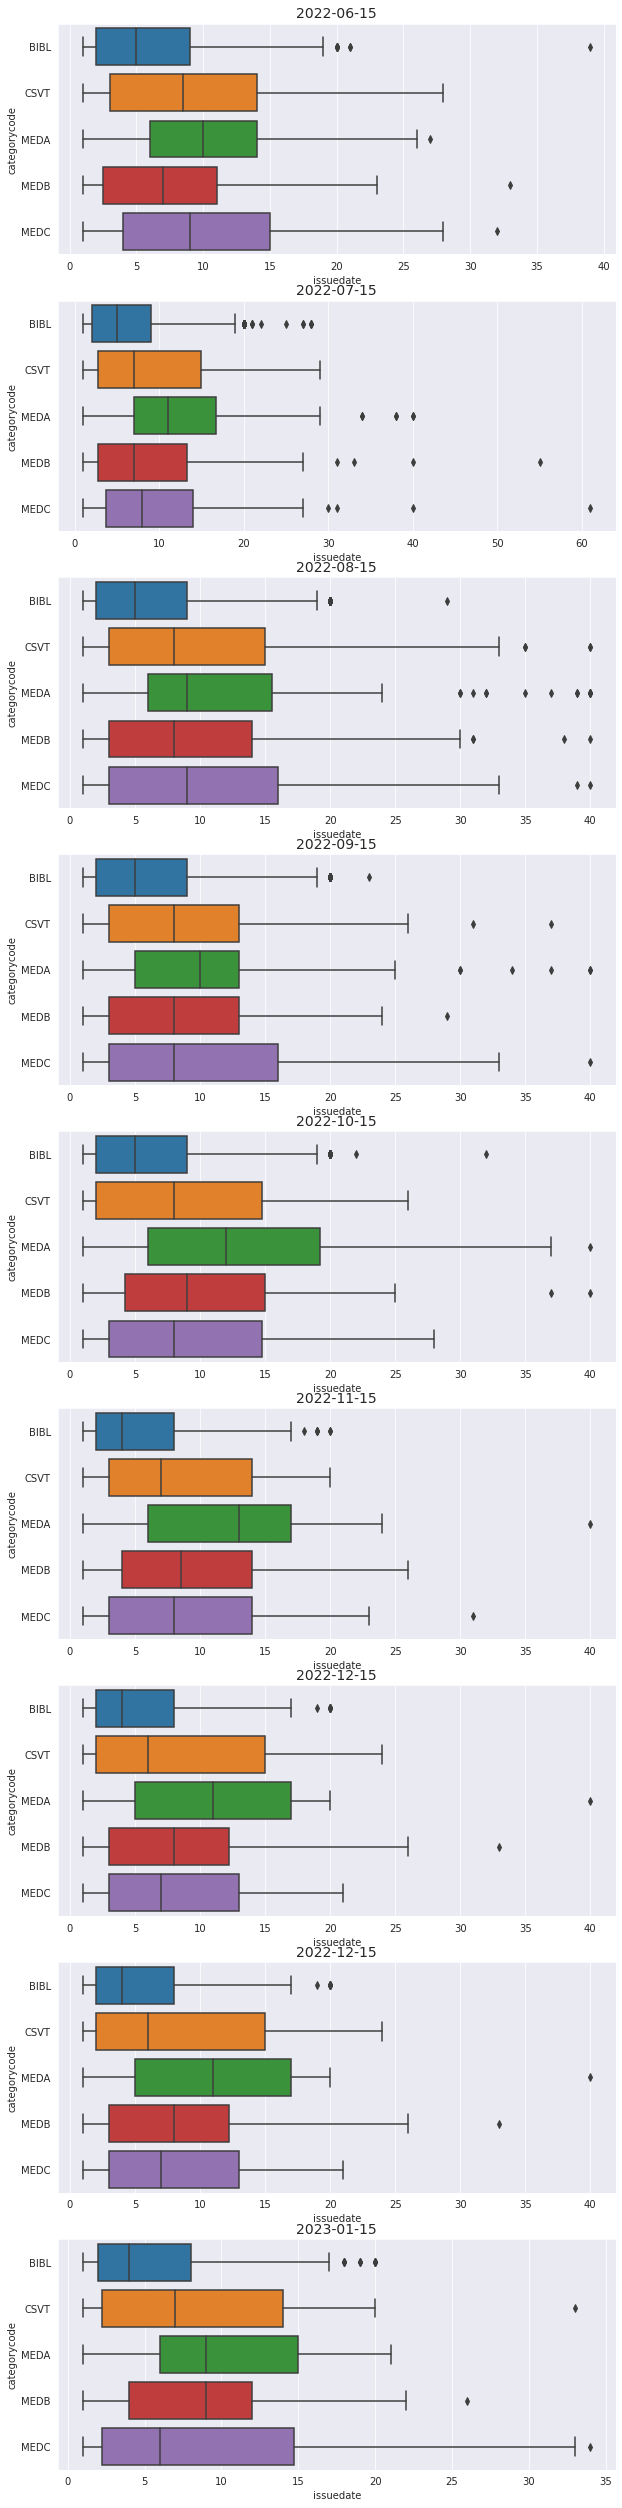

In [34]:
dates = ['2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15', '2022-12-15', '2022-12-15', '2023-01-15']
n = len(dates)
fig, axs = plt.subplots(nrows= n , ncols=1, figsize=(10, 5*n))
for i, date in enumerate(dates):
    ax = axs[i]
    query = f"SELECT * FROM statdb.stat_issues WHERE DATE(issuedate) <= '{date}' AND DATE(returndate) >= '{date}'"
    prets = pd.read_sql(query, con=db_conn)
    prets_by_borrower = prets.groupby(['categorycode', 'borrowernumber'])['issuedate'].count().reset_index()
    prets_by_borrower = prets_by_borrower[prets_by_borrower['categorycode'].isin(['BIBL', 'CSVT', 'MEDA', 'MEDB', 'MEDC'])]
    sns.boxplot(ax = ax, data=prets_by_borrower, x="issuedate", y="categorycode")
    ax.set_title(date, fontsize=14)
    

In [40]:
dates = ['2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15', '2022-12-15', '2022-12-15', '2023-01-15']
n = len(dates)
for i, date in enumerate(dates):
    query = f"SELECT * FROM statdb.stat_issues WHERE DATE(issuedate) <= '{date}' AND DATE(returndate) >= '{date}'"
    prets = pd.read_sql(query, con=db_conn)
    prets_by_borrower = prets.groupby(['categorycode', 'borrowernumber'])['issuedate'].count().reset_index()
    prets_by_borrower = prets_by_borrower[prets_by_borrower['categorycode'].isin(['BIBL', 'CSVT', 'MEDA', 'MEDB', 'MEDC'])]
    print(f"{date}")
    for cat in prets_by_borrower['categorycode'].unique():
        print(cat)
        data = prets_by_borrower[prets_by_borrower['categorycode'] == cat]
        print(f"Mediane : {data['issuedate'].quantile(0.5)}")
        print(f"0.75 : {data['issuedate'].quantile(0.75)}")
        print(f"0.90 : {data['issuedate'].quantile(0.90)}")
        print(f"0.95 : {data['issuedate'].quantile(0.95)}")
    print(f"-------")

2022-06-15
BIBL
Mediane : 5.0
0.75 : 9.0
0.90 : 10.0
0.95 : 10.0
CSVT
Mediane : 8.5
0.75 : 14.0
0.90 : 17.700000000000003
0.95 : 20.0
MEDA
Mediane : 10.0
0.75 : 14.0
0.90 : 20.0
0.95 : 20.0
MEDB
Mediane : 7.0
0.75 : 11.0
0.90 : 20.0
0.95 : 20.0
MEDC
Mediane : 9.0
0.75 : 15.0
0.90 : 20.0
0.95 : 20.0
-------
2022-07-15
BIBL
Mediane : 5.0
0.75 : 9.0
0.90 : 11.0
0.95 : 16.0
CSVT
Mediane : 7.0
0.75 : 15.0
0.90 : 20.0
0.95 : 22.64999999999999
MEDA
Mediane : 11.0
0.75 : 16.75
0.90 : 24.0
0.95 : 33.74999999999994
MEDB
Mediane : 7.0
0.75 : 13.25
0.90 : 20.89999999999999
0.95 : 26.64999999999999
MEDC
Mediane : 8.0
0.75 : 14.0
0.90 : 20.0
0.95 : 23.0
-------
2022-08-15
BIBL
Mediane : 5.0
0.75 : 9.0
0.90 : 13.0
0.95 : 19.0
CSVT
Mediane : 8.0
0.75 : 15.0
0.90 : 21.0
0.95 : 32.79999999999998
MEDA
Mediane : 9.0
0.75 : 15.5
0.90 : 31.200000000000003
0.95 : 39.0
MEDB
Mediane : 8.0
0.75 : 14.0
0.90 : 20.0
0.95 : 25.0
MEDC
Mediane : 9.0
0.75 : 16.0
0.90 : 20.0
0.95 : 22.69999999999999
-------
2022-09-15


In [22]:
date = "2022-08-15"
query = f"SELECT * FROM statdb.stat_issues WHERE DATE(issuedate) <= '{date}' AND DATE(returndate) >= '{date}'"
prets = pd.read_sql(query, con=db_conn)
prets_by_borrower = prets.groupby(['categorycode', 'borrowernumber'])['issuedate'].count().reset_index()
prets_by_borrower_med = prets_by_borrower[prets_by_borrower['categorycode'].isin(['BIBL'])]
prets_by_borrower_medplus = prets_by_borrower[prets_by_borrower['categorycode'].isin(['CSVT', 'MEDA', 'MEDB', 'MEDC'])]


In [23]:
borrowers_med_by_nbprets = prets_by_borrower_med.groupby(['issuedate'])['borrowernumber'].count().reset_index()
borrowers_med_by_nbprets.columns = ['nb_prets', 'nb_emprunteurs']
borrowers_med_by_nbprets['nb_emprunteurs_pourc'] = round(borrowers_med_by_nbprets['nb_emprunteurs'] / borrowers_med_by_nbprets['nb_emprunteurs'].sum() * 100, 0)
borrowers_med_by_nbprets['nb_emprunteurs_pourc'] = borrowers_med_by_nbprets['nb_emprunteurs_pourc'].astype(int)
borrowers_med_by_nbprets['nb_emprunteurs_cumulés'] = borrowers_med_by_nbprets['nb_emprunteurs'].cumsum()
borrowers_med_by_nbprets['nb_emprunteurs_cumulés_pourc'] = round(borrowers_med_by_nbprets['nb_emprunteurs_cumulés'] / borrowers_med_by_nbprets['nb_emprunteurs'].sum() * 100, 0)
borrowers_med_by_nbprets['nb_emprunteurs_cumulés_pourc'] = borrowers_med_by_nbprets['nb_emprunteurs_cumulés_pourc'].astype(int)
borrowers_med_by_nbprets

,nb_prets,nb_emprunteurs,nb_emprunteurs_pourc,nb_emprunteurs_cumulés,nb_emprunteurs_cumulés_pourc
0,1,476,19,476,19
1,2,293,12,769,30
2,3,273,11,1042,41
3,4,203,8,1245,49
4,5,216,8,1461,57
5,6,174,7,1635,64
6,7,122,5,1757,69
7,8,116,5,1873,74
8,9,99,4,1972,77
9,10,182,7,2154,85


In [14]:
borrowers_medplus_by_nbprets = prets_by_borrower_medplus.groupby(['issuedate'])['borrowernumber'].count().reset_index()
borrowers_medplus_by_nbprets.columns = ['nb_prets', 'nb_emprunteurs']
borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés'] = borrowers_medplus_by_nbprets['nb_emprunteurs'].cumsum()
borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés_pourc'] = round(borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés'] / borrowers_medplus_by_nbprets['nb_emprunteurs'].sum() * 100, 0)
borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés_pourc'] = borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés_pourc'].astype(int)
borrowers_medplus_by_nbprets

,nb_prets,nb_emprunteurs,nb_emprunteurs_cumulés,nb_emprunteurs_cumulés_pourc
0,1,61,61,11
1,2,32,93,17
2,3,21,114,21
3,4,22,136,25
4,5,33,169,31
5,6,20,189,35
6,7,30,219,41
7,8,31,250,47
8,9,32,282,53
9,10,28,310,58


<AxesSubplot:xlabel='nb_prets'>

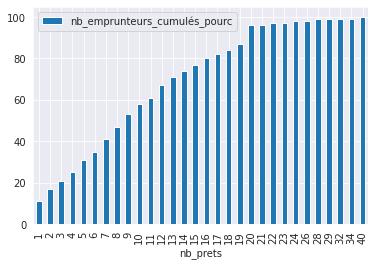

In [17]:
borrowers_medplus_by_nbprets.plot(kind='bar', x='nb_prets', y = 'nb_emprunteurs_cumulés_pourc')

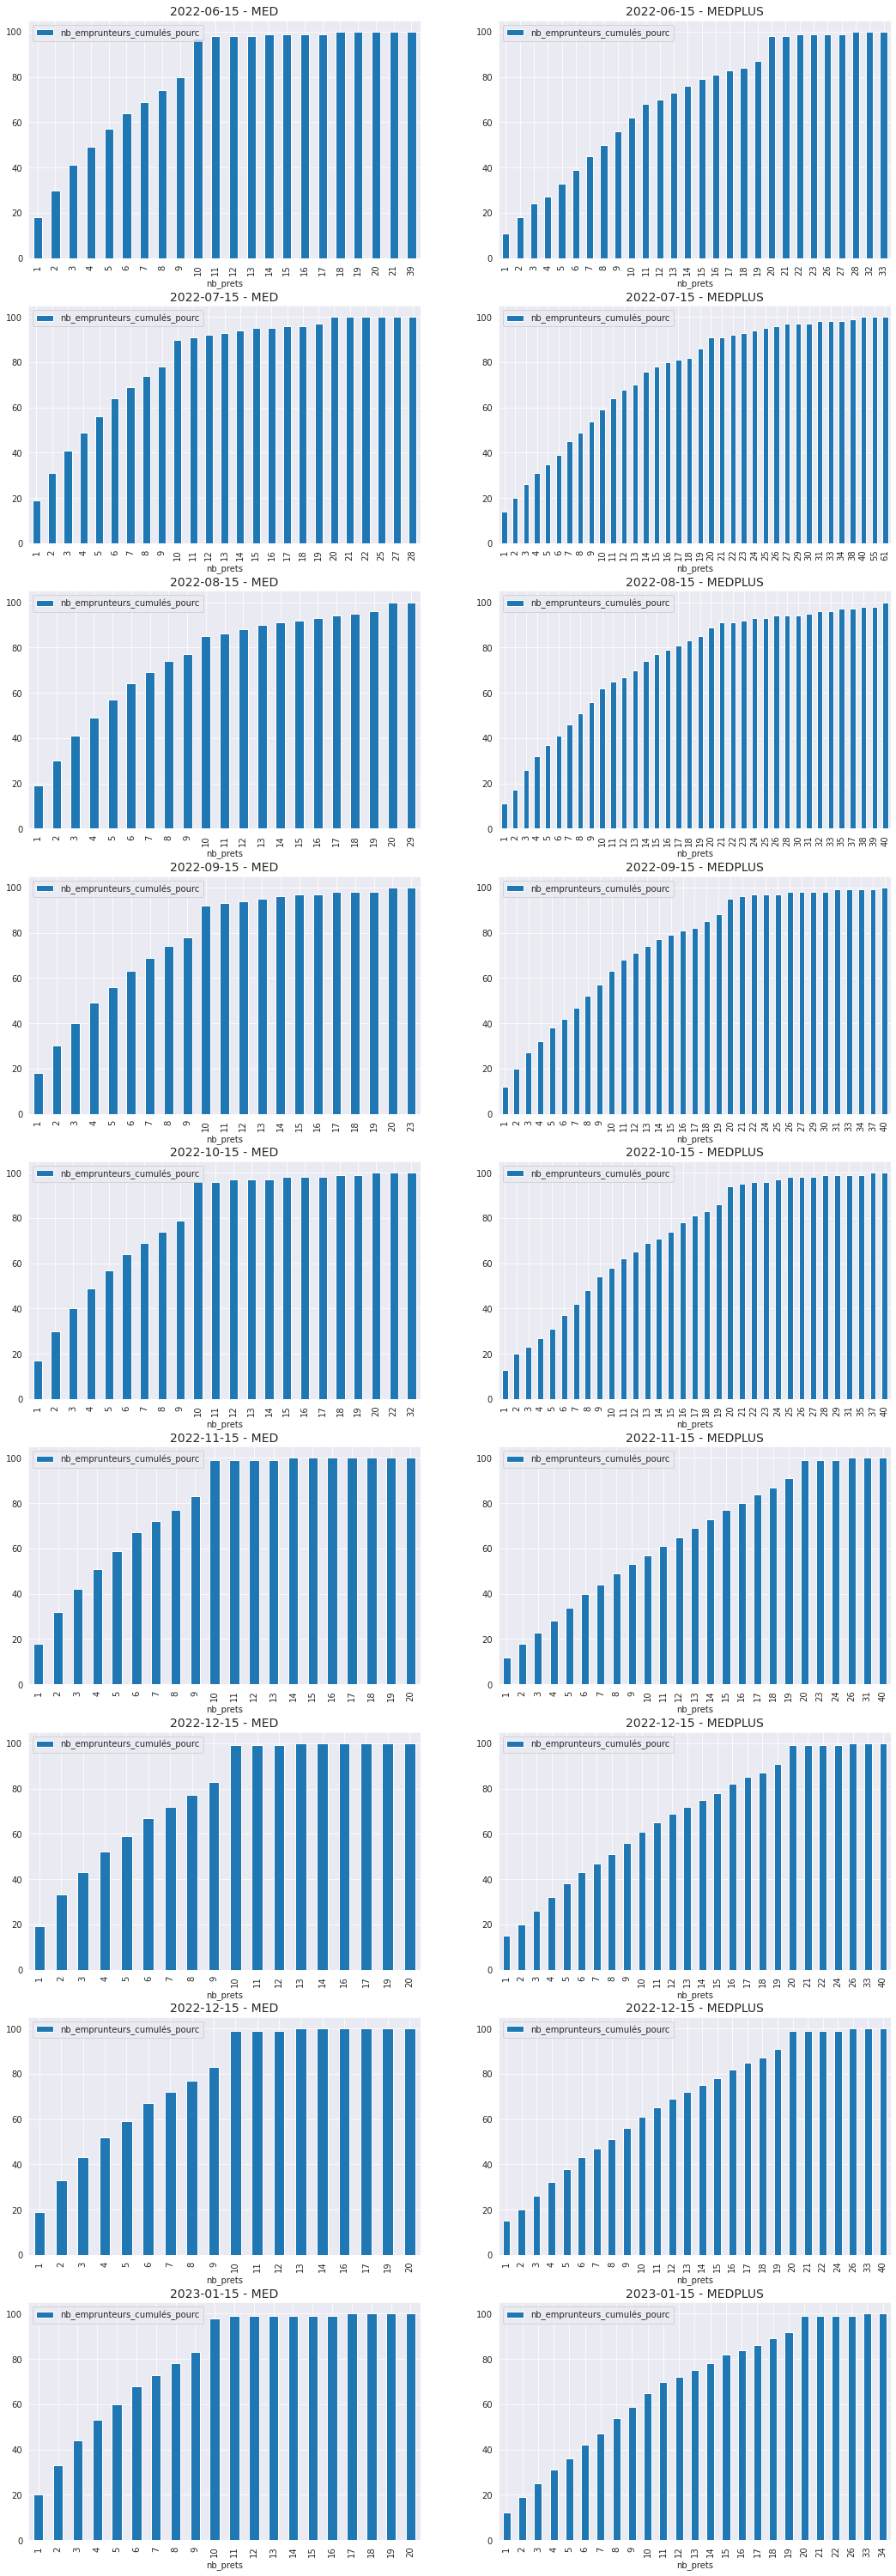

In [21]:
dates = ['2022-06-15', '2022-07-15', '2022-08-15', '2022-09-15', '2022-10-15', '2022-11-15', '2022-12-15', '2022-12-15', '2023-01-15']
n = len(dates)
fig, axs = plt.subplots(nrows= n , ncols=2, figsize=(18, 6*n))
for i, date in enumerate(dates):
    query = f"SELECT * FROM statdb.stat_issues WHERE DATE(issuedate) <= '{date}' AND DATE(returndate) >= '{date}'"
    prets = pd.read_sql(query, con=db_conn)
    prets_by_borrower = prets.groupby(['categorycode', 'borrowernumber'])['issuedate'].count().reset_index()
    
    prets_by_borrower_med = prets_by_borrower[prets_by_borrower['categorycode'].isin(['BIBL'])]
    prets_by_borrower_medplus = prets_by_borrower[prets_by_borrower['categorycode'].isin(['CSVT', 'MEDA', 'MEDB', 'MEDC'])]

    
    ax = axs[i][0]
    borrowers_med_by_nbprets = prets_by_borrower_med.groupby(['issuedate'])['borrowernumber'].count().reset_index()
    borrowers_med_by_nbprets.columns = ['nb_prets', 'nb_emprunteurs']
    borrowers_med_by_nbprets['nb_emprunteurs_pourc'] = round(borrowers_med_by_nbprets['nb_emprunteurs'] / borrowers_med_by_nbprets['nb_emprunteurs'].sum() * 100, 0)
    borrowers_med_by_nbprets['nb_emprunteurs_pourc'] = borrowers_med_by_nbprets['nb_emprunteurs_pourc'].astype(int)
    borrowers_med_by_nbprets['nb_emprunteurs_cumulés'] = borrowers_med_by_nbprets['nb_emprunteurs'].cumsum()
    borrowers_med_by_nbprets['nb_emprunteurs_cumulés_pourc'] = round(borrowers_med_by_nbprets['nb_emprunteurs_cumulés'] / borrowers_med_by_nbprets['nb_emprunteurs'].sum() * 100, 0)
    borrowers_med_by_nbprets['nb_emprunteurs_cumulés_pourc'] = borrowers_med_by_nbprets['nb_emprunteurs_cumulés_pourc'].astype(int)
    borrowers_med_by_nbprets.plot(kind='bar', ax= ax, x='nb_prets', y = 'nb_emprunteurs_cumulés_pourc')
    ax.set_title(f"{date} - MED", fontsize=14)
    
    ax = axs[i][1]
    borrowers_medplus_by_nbprets = prets_by_borrower_medplus.groupby(['issuedate'])['borrowernumber'].count().reset_index()
    borrowers_medplus_by_nbprets.columns = ['nb_prets', 'nb_emprunteurs']
    borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés'] = borrowers_medplus_by_nbprets['nb_emprunteurs'].cumsum()
    borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés_pourc'] = round(borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés'] / borrowers_medplus_by_nbprets['nb_emprunteurs'].sum() * 100, 0)
    borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés_pourc'] = borrowers_medplus_by_nbprets['nb_emprunteurs_cumulés_pourc'].astype(int)
    borrowers_medplus_by_nbprets.plot(kind='bar', ax= ax, x='nb_prets', y = 'nb_emprunteurs_cumulés_pourc')
    ax.set_title(f"{date} - MEDPLUS", fontsize=14)
